In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
advertising_data = pd.read_csv("./../dataset/Advertising.csv", index_col=0)

In [43]:
advertising_data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [44]:
from sklearn import preprocessing

# scaling as neural networks work better with small data
advertising_data["TV"] = preprocessing.scale(advertising_data["TV"])
advertising_data["radio"] = preprocessing.scale(advertising_data["radio"])
advertising_data["newspaper"] = preprocessing.scale(advertising_data["newspaper"])

In [45]:
X = advertising_data.drop("sales", axis=1)
Y = advertising_data["sales"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [46]:
import torch

x_train_tensor = torch.tensor(x_train.values, dtype=torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [47]:
inp = 3 # dimension of input layer
out = 1 # dimension of output layer
hid = 100 # hidden layers
loss_fun = torch.nn.MSELoss()

learning_rate = 0.0001 # how much the model learns during each epoch

In [48]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                           torch.nn.ReLU(),
                           torch.nn.Linear(hid, out))

In [49]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [50]:
number_epochs = 10000

for iter in range(number_epochs):
    y_pred = model(x_train_tensor)
    
    loss = loss_fun(y_pred, y_train_tensor)
    
    if iter % 1000 == 0:
        print(iter, loss.item()) # show what the loss is at that point
        
    optimizer.zero_grad() # zero out the gradients, since they get accumulated
    # https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch
    loss.backward() # calculate the gradients to apply to the model's parameters
    
    optimizer.step() # apply the gradients to the model

c:\users\galina\.conda\envs\mlpython\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([180])) that is different to the input size (torch.Size([180, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 223.75450134277344
1000 135.8844757080078
2000 56.60222244262695
3000 35.60854721069336
4000 33.216304779052734
5000 31.332731246948242
6000 29.45722198486328
7000 27.971099853515625
8000 27.09315299987793
9000 26.749897003173828


In [51]:
y_pred_tensor = model(x_test_tensor)
y_pred_tensor[:5]

tensor([[13.9601],
        [14.0733],
        [14.1962],
        [14.3972],
        [14.1416]], grad_fn=<SliceBackward>)

In [52]:
y_pred = y_pred_tensor.detach().numpy()

Text(0, 0.5, 'actual')

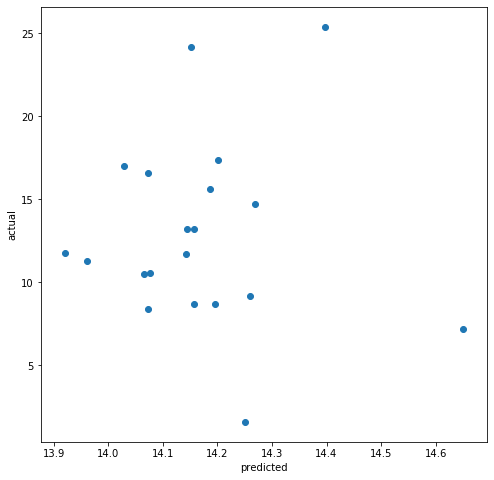

In [53]:
plt.figure(figsize=(8, 8))
plt.scatter(y_pred, y_test)

plt.xlabel("predicted")
plt.ylabel("actual")

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.061112281903830556